In [8]:
pip install yfinance matplotlib

You should consider upgrading via the '/Users/gaiadennison/.local/share/virtualenvs/firstproj-Z2qs4nSv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import random

In [10]:
tesla = yf.Ticker('tsla')

In [11]:
history = tesla.history(period='max')

In [14]:
window = 20
tesla_length = len(history['Close'])
moving_avg = []
pr=[]
stdev_upper = []
stdev_lower = []
index = []
for i in range(tesla_length-200, tesla_length):
    history['Close'][i:i+window]
    mean = history['Close'][i:i+window].mean()
    moving_avg.append(mean)
    stdev_upper.append(mean+2*history['Close'][i:i+window].std())
    stdev_lower.append(mean-2*history['Close'][i:i+window].std())
    index.append(i)

In [15]:
stdev_lower

[566.4157380753568,
 571.6190665202633,
 574.2048855633257,
 580.2878396382681,
 583.6851742477304,
 589.3108267004093,
 589.2334073223981,
 588.2897185075745,
 588.3122432216451,
 585.9713800253608,
 580.9887822498284,
 577.9497448662062,
 576.5501714323784,
 576.936089855057,
 580.2937775102987,
 588.2646424317347,
 609.6548885680519,
 609.5914987907895,
 609.7791859196809,
 610.5968589373532,
 609.9792539455674,
 600.0456003554439,
 597.0707342530129,
 593.9737836762172,
 593.4775550709066,
 595.5493229334786,
 596.4098215421332,
 596.8748519853057,
 604.3136205268098,
 610.6112371757838,
 622.7666321118088,
 639.8769536581555,
 651.3230939761122,
 653.0088444907797,
 660.0585155838094,
 659.1592022851843,
 656.2293341266311,
 656.223229278026,
 652.4193574583867,
 651.5930741255698,
 637.6710258868816,
 625.0222110480307,
 605.1573588932656,
 584.5896929211567,
 572.4953899913481,
 558.4055064811607,
 546.9094625175094,
 536.74799547779,
 531.037957233802,
 527.146461314665,
 530.1

In [16]:
stdev_upper

[840.3522611922212,
 824.3309334797367,
 809.811117854643,
 794.0941610941537,
 777.2748233108634,
 759.0061715906063,
 754.6335909686175,
 751.9092744123474,
 740.7117496982769,
 738.8696172890923,
 738.1732172618903,
 730.4982531806688,
 726.8158258820747,
 727.9029055062712,
 728.5762176068888,
 729.9153502440465,
 721.3871036194481,
 721.1894887580386,
 722.5758006525848,
 719.5001320294438,
 720.9427370212294,
 736.3143910996343,
 744.824254760659,
 751.6252031401891,
 760.7834373607341,
 764.6876704747244,
 768.7261708895076,
 776.4571426436005,
 777.9603723931122,
 780.5637567207007,
 780.3573608081131,
 772.5920404824695,
 767.0239030942003,
 766.2451533119547,
 763.9644824630657,
 764.2487994238,
 765.3766656292282,
 765.3797736516616,
 767.1576444947384,
 767.5189253861489,
 774.1469733806966,
 772.2837887078286,
 777.9146442805625,
 781.7663129382183,
 778.8566119617768,
 779.1664966926674,
 776.5505411446,
 768.6460108698661,
 761.0650517994011,
 750.1045457654131,
 733.897

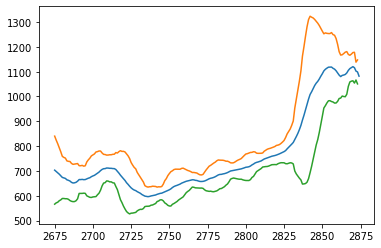

In [17]:
plt.plot(index, moving_avg)
plt.plot(index, stdev_upper)
plt.plot(index, stdev_lower)
plt.show()

In [18]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)>

In [ ]:
tickers = list(table[0]['Symbol'])

In [ ]:
stock_dict = {}
for i in tickers:
  ticker = yf.Ticker(i)
  ticker_history = ticker.history(period='max')
  stock_dict[i] = ticker_history

In [ ]:
ticker = yf.Ticker('spy')
spy = ticker.history(period='max')
aapl = stock_dict['AAPL']

In [ ]:
pd.merge(aapl, spy, left_index=True, right_index=True)

In [ ]:
del stock_dict['BRK.B']
del stock_dict['BF.B']

In [ ]:
y = []
x = []
tickers = []
for tick in stock_dict.keys():
    window = 20
    pred = 20
    sec = stock_dict[tick]
    merged = pd.merge(spy, sec, left_index=True, right_index=True)
    stock_len = len(merged) - window - pred
    start = random.choice(range(0, stock_len))
    moving_avg = []
    pr = []
    stdev_upper = []
    stdev_lower = []
    ind = []
    osc = []
    price = []
    pred_price = []
    spy_price = []
    spy_pred_price = []
    for i in range(start, start + window):
        mean = merged['Close_x'][i:i + window].mean()
        moving_avg.append(mean)
        stdev_upper.append(mean + 2 * merged['Close_x'][i:i + window].std())
        stdev_lower.append(mean - 2 * merged['Close_x'][i:i + window].std())
        ind.append(i)
        osc.append((merged['Close_x'][i] - merged['Close_x'][i + window]) / merged['Close_x'][i + window])
        price.append(merged['Close_x'][i])
        pred_price.append(merged['Close_x'][i + pred])
        spy_price.append(merged['Close_y'][i])
        spy_pred_price.append(merged['Close_y'][i + pred])
    temp_df = pd.DataFrame([moving_avg, stdev_upper, stdev_lower, osc])
    temp_df = temp_df.T
    temp_merged = merged[start:start + window]
    temp_df.index = temp_merged.index
    return_sst = []
    return_spy = []
    for i in range(0, len(price)):
        return_sst.append(pred_price[i] - price[-1])
        return_spy.append(spy_pred_price[i] - spy_price[-1])
    observed = (sum(return_sst) / len(return_sst) - sum(return_spy) / len(return_spy)) / statistics.stdev(return_sst)
    y.append(observed)
    tickers.append(tick)
    x.append(pd.merge(temp_df, temp_merged, right_index=True, left_index=True))

In [ ]:
x[0]

In [ ]:
tickers[0]

In [ ]:
y[0]